# Standard PCA


In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
X = data.data
Y = data.target

In [4]:
df = pd.DataFrame(X,columns = data.feature_names )

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Using eigen Decomposition

In [6]:
S = X- X.mean(axis=0)
co_matrix = np.cov(S.T)
eig_val,eig_vec = np.linalg.eig(co_matrix)

In [7]:
xtr0 = np.vstack((S.dot(eig_vec[0]),S.dot(eig_vec[1]))).T

In [8]:
xtr0[:5]

array([[-2.64968422, 10.70699964],
       [-2.54001736, -6.4507313 ],
       [-2.065008  , -6.88928147],
       [-3.31878614, -4.510099  ],
       [-0.6175158 , 12.18392754]])

# Using SVD

In [9]:
X_centered = X - X.mean(axis=0)
U,S,V = np.linalg.svd(X_centered)

In [10]:
pc1 = V[0]
pc2 = V[1]

In [11]:
x1 = X_centered.dot(pc1)
x2 = X_centered.dot(pc2)

In [12]:
Xtr1 = np.vstack((x1,x2)).T

In [13]:
Xtr1[:5]

array([[-3.18562979e+02, -2.14921307e+01],
       [-3.03097420e+02,  5.36471768e+00],
       [-4.38061133e+02,  6.53730945e+00],
       [-7.33240139e+02, -1.92729032e-01],
       [ 1.15714285e+01, -1.84899946e+01]])

# Using Sklearn PCA function
but it also uses svd under the hood

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
xtr2 = pca.fit_transform(X)

In [16]:
xtr2[:5]

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01]])

In [17]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

In [18]:
V[:2]

array([[-1.65926472e-03,  6.81015556e-04, -1.94905742e-04,
         4.67130058e-03, -1.78680075e-02, -9.89829680e-04,
        -1.56728830e-03,  1.23086662e-04, -6.00607792e-04,
        -2.32714319e-03, -1.71380037e-04, -7.04931645e-04,
        -9.99822937e-01],
       [-1.20340617e-03, -2.15498184e-03, -4.59369254e-03,
        -2.64503930e-02, -9.99344186e-01, -8.77962152e-04,
         5.18507284e-05,  1.35447892e-03, -5.00440040e-03,
        -1.51003530e-02,  7.62673115e-04,  3.49536431e-03,
         1.77738095e-02]])

Text(0.5, 1.0, 'Using Raw SVD')

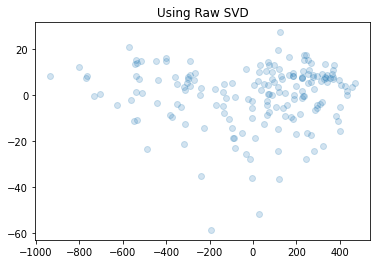

In [23]:
plt.scatter(Xtr1[:, 0], Xtr1[:, 1], alpha=0.2)
plt.title("Using Raw SVD")

Text(0.5, 1.0, 'Using Sklearn PCA')

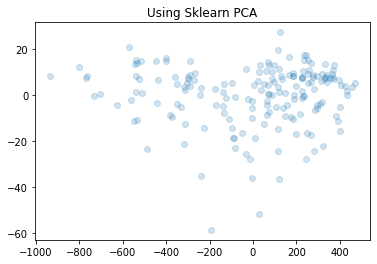

In [24]:
plt.scatter(xtr2[:, 0]*-1, xtr2[:, 1]*-1, alpha=0.2)
plt.title("Using Sklearn PCA")

multiplyed by -1 because the values are opposite to the Standard SVD method

Text(0.5, 1.0, 'Using Eigen decomposition')

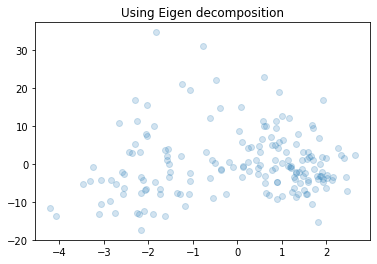

In [25]:
plt.scatter(xtr0[:, 0], xtr0[:, 1], alpha=0.2)
plt.title("Using Eigen decomposition")